In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import sklearn.metrics as ev
import os

imp = ["AntiVax", "Neutral", "ProVax"][0]

In [19]:
X = pd.read_csv("../data/BERT/X_train.csv").to_numpy()
print(f"shape of X = {X.shape}")

Y = pd.read_csv("../data/BERT/Y_train.csv")[imp].to_numpy().reshape(X.shape[0],1)
print(f"shape of Y = {Y.shape}")

if os.path.exists(f"results/theta_{imp}.npy"):
    print(f"Loading theta_{imp}")
    theta = np.load(f"results/theta_{imp}.npy")
else:
    print("Could not find theta file, so starting with random theta.")
    theta = np.random.rand(X.shape[1], 1)
print(f"shape of theta = {theta.shape}")

shape of X = (3673, 769)
shape of Y = (3673, 1)
Could not find theta file, so starting with random theta.
shape of theta = (769, 1)


In [3]:
def g(x):
    return 1 / (1 + np.exp(-x))

def h(x, theta):
    return g(x@theta)

def J(theta, X, Y):
    return np.mean((Y - 1) * np.log(1 - h(X, theta)) - Y * np.log(h(X, theta)))

def predict(threshold = 0.5):
    return (h(X_test, theta) > threshold).astype(int)

100%|██████████| 20000/20000 [02:02<00:00, 163.37it/s]


0.4622744033424136

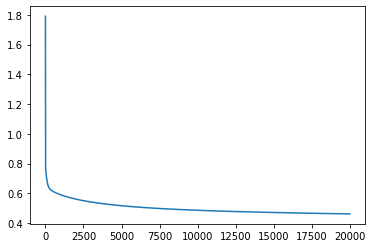

In [4]:
# X = pd.read_csv("../data/BERT/X_train.csv").to_numpy()
# # print(f"shape of X = {X.shape}")
# Y = pd.read_csv("../data/BERT/Y_train.csv")["ProVax"].to_numpy().reshape(X.shape[0],1)
# # print(f"shape of Y = {Y.shape}")
# theta = np.random.rand(X.shape[1], 1)
# # print(f"shape of theta = {theta.shape}")

# # Do Gradient Descent and get optimum theta
Js = {}
alpha = 0.01/len(X)
for i in tqdm(range(2*10**4)):
    Js[i] = J(theta, X, Y)
    slope = (X.T @ (h(X, theta) - Y))
    theta = theta - alpha * slope
plt.plot(Js.keys(), Js.values())
Js[list(Js.keys())[-1]]

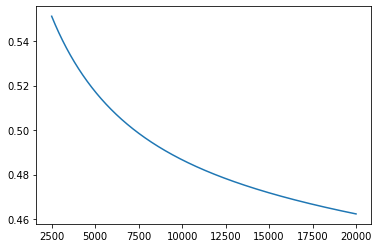

In [18]:
plt.plot(list(Js.keys())[2500:], list(Js.values())[2500:])

In [5]:
# Load Test Data
X_test = pd.read_csv("../data/BERT/X_test.csv").to_numpy()
print(f"shape of X_test = {X_test.shape}")
Y_test = pd.read_csv("../data/BERT/Y_test.csv")[imp].to_numpy().reshape(X_test.shape[0],1)
print(f"shape of Y_test = {Y_test.shape}")

shape of X_test = (919, 769)
shape of Y_test = (919, 1)


Text(0.5, 1.0, 'ROC Curve for AntiVax')

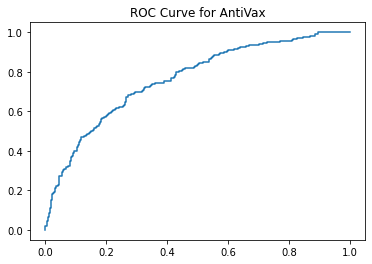

In [6]:
roc = ev.roc_curve(Y_test, h(X_test, theta), pos_label=1)
plt.plot(roc[0], roc[1])
plt.title(f"ROC Curve for {imp}")

In [7]:
# plt.plot(roc[0], roc[1])
# plt.title(f"ROC Curve for {imp}")
# plt.savefig("trial.png")

In [8]:
np.save(f"theta_{imp}.npy", theta)

In [9]:
loa = np.load("theta_Neutral.npy")

FileNotFoundError: [Errno 2] No such file or directory: 'theta_Neutral.npy'